In [2]:
"""
Import the necessary Packages
"""
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
sys.path.append(os.path.abspath(os.path.join('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data_preparation')))
"""
Import required Data processing scripts
"""

from Data_Loader import Data_Loader 
from Preprocess_Working_Data import Data_Preprocessing
from Make_Plots import Make_Plots 

In [4]:
DL=Data_Loader()
dp=Data_Preprocessing()
mp=Make_Plots()




In [5]:
#Load the Data to work on
sample_data=DL.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\sample_submission.csv")
training_data=DL.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\train.csv")
test_data=DL.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\test.csv")
store_data=DL.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\store.csv")

E:\10xAccademy_Practice\Week 3\Week 3 Challenge\Data_preparation\Data_Loader.py:30: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_file)


In [6]:
training_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test_data.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [40]:
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [41]:
sample_data.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# See the Details of the data

In [42]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [43]:
training_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# See overview of the data including missing values

In [8]:
training_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
#There are no missing values in the training data

In [63]:
training_data.duplicated().sum()

0

In [64]:
training_data.shape

(1017209, 9)

In [45]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [60]:
test_data.shape

(41088, 8)

In [62]:
test_data.duplicated().sum()

0

In [47]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [ ]:
#there is missing value in Open column, needs to be handled

In [48]:
sample_data.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [49]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [50]:
sample_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [57]:
sample_data.duplicated().sum()

0

In [59]:
sample_data.shape

(41088, 2)

In [51]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [52]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [54]:
store_data.shape

(1115, 10)

In [56]:
store_data.duplicated().sum()

0

In [53]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# There are lot of missing values, need to be handled

# Merge the Data from sales and Store table

In [9]:
# Train and Test data is sales data, but store dataset contains store data.
# Thus need to be merged on common Attribute for both tables (Store column)

train_merge=dp.join_dataframes(training_data,store_data,on="Store",how="left")
test_merge=dp.join_dataframes(test_data,store_data,on="Store",how="left")


# See Overview and Statistics of Merged Data 

In [10]:
train_merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [72]:
train_merge.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [73]:
test_merge.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Data transformation 

In [11]:
# Check the data type of all Columns
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [86]:
train_merge['Date']

0          2015-07-31
1          2015-07-30
2          2015-07-29
3          2015-07-28
4          2015-07-27
              ...    
1017204    2013-01-05
1017205    2013-01-04
1017206    2013-01-03
1017207    2013-01-02
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object

In [87]:
test_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [89]:
test_merge['Date']

0        2015-09-17
1        2015-09-16
2        2015-09-15
3        2015-09-14
4        2015-09-13
            ...    
41083    2015-08-05
41084    2015-08-04
41085    2015-08-03
41086    2015-08-02
41087    2015-08-01
Name: Date, Length: 41088, dtype: object

In [ ]:
# The date column is object type, but it needs to be converted into datetime using pandas datetime function

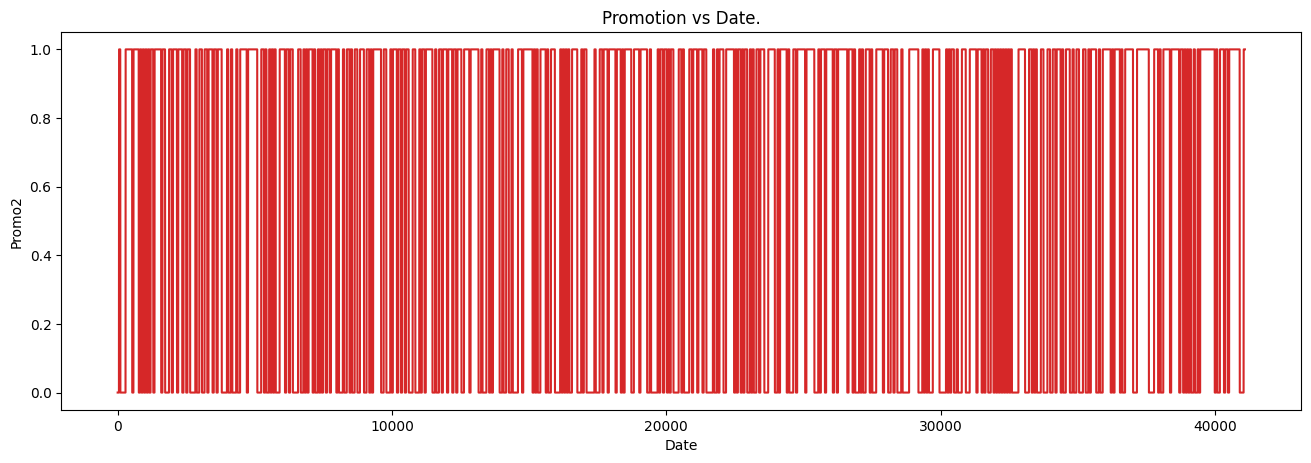

In [103]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Promo2', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(test_merge, x=test_merge.index, y=test_merge.Promo2, title='Promotion vs Date.')    

In [ ]:
# The data do not seem time series data 

In [116]:
# Convert the Date  column from object type to  datetime using pandas.to_datetime() function
# Import convert_to_datetime from Data_preprocessing and convert the Date or use default pandas function
#test_merge['Date']=pd.to_datetime(test_merge['Date'],"Date")
#train_merge['Date']=pd.to_datetime(train_merge['Date'],'Date')


In [12]:
train_merge=dp.convert_to_datetime(train_merge,"Date")
test_merge=dp.convert_to_datetime(test_merge,"Date")

In [16]:
# Extract Date values such as year, month, day, weelk, daysin aweek,  from the date column
train_merge=dp.extract_fields_date(train_merge,"Date")
test_merge=dp.extract_fields_date(test_merge,"Date")

E:\10xAccademy_Practice\Week 3\Week 3 Challenge\Data_preparation\Preprocess_Working_Data.py:136: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear
E:\10xAccademy_Practice\Week 3\Week 3 Challenge\Data_preparation\Preprocess_Working_Data.py:136: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear


In [18]:
train_merge.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,Month,Year,Day,weekday,weekofyear,weekend
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,31,4,31,0
1,1,3,2015-07-30,5020,546,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,30,3,31,0
2,1,2,2015-07-29,4782,523,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,29,2,31,0
3,1,1,2015-07-28,5011,560,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,28,1,31,0
4,1,0,2015-07-27,6102,612,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,27,0,31,1


In [20]:
test_merge.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,1,1,3,2015-09-17,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,17,3,38,0
1,857,1,2,2015-09-16,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,16,2,38,0
2,1713,1,1,2015-09-15,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,15,1,38,0
3,2569,1,0,2015-09-14,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,14,0,38,1
4,3425,1,6,2015-09-13,0.0,0,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,13,6,37,1


In [21]:
# set a new index, make Date as an index
train_merge.set_index("Date",inplace=True)
test_merge.set_index("Date",inplace=True)

In [23]:
train_merge.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,Month,Year,Day,weekday,weekofyear,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,c,a,...,NaN,NaN,NaN,7,7,2015,31,4,31,0
2015-07-30,1,3,5020,546,1,1,0,1,c,a,...,NaN,NaN,NaN,7,7,2015,30,3,31,0
2015-07-29,1,2,4782,523,1,1,0,1,c,a,...,NaN,NaN,NaN,7,7,2015,29,2,31,0
2015-07-28,1,1,5011,560,1,1,0,1,c,a,...,NaN,NaN,NaN,7,7,2015,28,1,31,0
2015-07-27,1,0,6102,612,1,1,0,1,c,a,...,NaN,NaN,NaN,7,7,2015,27,0,31,1


# save the merged data with index

In [25]:
train_merge.to_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\train_merge.csv")
test_merge.to_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\test_merge.csv")

# load merged data from file


In [27]:
#load usind Data Loader
train_df = DL.read_csv('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\train_merge.csv')
test_df = DL.read_csv('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\test_merge.csv')

In [28]:
train_df.head(5)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,Month,Year,Day,weekday,weekofyear,weekend
0,2015-07-31,1,4,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,31,4,31,0
1,2015-07-30,1,3,5020,546,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,30,3,31,0
2,2015-07-29,1,2,4782,523,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,29,2,31,0
3,2015-07-28,1,1,5011,560,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,28,1,31,0
4,2015-07-27,1,0,6102,612,1,1,0,1,c,...,NaN,NaN,NaN,7,7,2015,27,0,31,1


In [29]:
test_df.head(5)

,Date,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,2015-09-17,1,1,3,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,17,3,38,0
1,2015-09-16,857,1,2,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,16,2,38,0
2,2015-09-15,1713,1,1,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,15,1,38,0
3,2015-09-14,2569,1,0,1.0,1,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,14,0,38,1
4,2015-09-13,3425,1,6,0.0,0,0,0,c,a,...,0,NaN,NaN,NaN,2015,9,13,6,37,1


In [95]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(test_merge, x='PromoInterval', y="Promo2")
fig.show()

# Get overview of Missing values


In [30]:
train_df.isnull().sum()

Date                              0
Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
month                             0
Month                             0
Year                              0
Day                               0
weekday                           0
weekofyear                        0
weekend                           0
dtype: int64

In [31]:
# Get percentage
dp.get_missing_data_percentage(train_df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceMonth,323348,31.8
CompetitionOpenSinceYear,323348,31.8
CompetitionDistance,2642,0.3
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Year,0,0.0


In [33]:
test_df.isnull().sum()

Date                             0
Id                               0
Store                            0
DayOfWeek                        0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
Year                             0
Month                            0
Day                              0
weekday                          0
weekofyear                       0
weekend                          0
dtype: int64

In [34]:
# Get Percentage 
dp.get_missing_data_percentage(test_df)

,Total,%
PromoInterval,17232,41.9
Promo2SinceYear,17232,41.9
Promo2SinceWeek,17232,41.9
CompetitionOpenSinceMonth,15216,37.0
CompetitionOpenSinceYear,15216,37.0
CompetitionDistance,96,0.2
Open,11,0.0
Promo2,0,0.0
weekofyear,0,0.0
weekday,0,0.0


# Identify columns that has highest missing values

In [ ]:
# There are columns with higher percentage of missing values, we need to handle such like values using appropriate method
# from the above Date frame, it is clearly shown that:
#[PromoInterval, Promo2SinceYear, Promo2SinceWeek, CompetitionOpenSinceMonth,  CompetitionOpenSinceYear, 
#CompetitionDistance, Open]  contain missing values from test data column

#[PromoInterval, Promo2SinceYear, Promo2SinceWeek, CompetitionOpenSinceMonth,CompetitionOpenSinceYear, 
#CompetitionDistance] contain missing values from training data


In [ ]:
# We will use Mode to handle missing values from categorical columns

In [35]:
#visualize
missing_df = train_df[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head(10)

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
0,NaN,NaN,NaN,9.0,2008.0,1270.0,1
1,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2,NaN,NaN,NaN,9.0,2008.0,1270.0,1
3,NaN,NaN,NaN,9.0,2008.0,1270.0,1
4,NaN,NaN,NaN,9.0,2008.0,1270.0,1
5,NaN,NaN,NaN,9.0,2008.0,1270.0,0
6,NaN,NaN,NaN,9.0,2008.0,1270.0,1
7,NaN,NaN,NaN,9.0,2008.0,1270.0,1
8,NaN,NaN,NaN,9.0,2008.0,1270.0,1
9,NaN,NaN,NaN,9.0,2008.0,1270.0,1


In [37]:
# Fill the Missing values using the Median
miss_1 = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
train_df = dp.fill_missing_median(train_df, miss_1)
test_df = dp.fill_missing_median(test_df, miss_1)

In [45]:
# Fill with zero (0)
#len(test_df['Open']==1)
test_df = dp.fill_missing_with_zero(test_df, ['Open'])
# Fill with Mode value
train_df = dp.fill_missing_mode(train_df, ['PromoInterval'])
test_df = dp.fill_missing_mode(test_df, ['PromoInterval'])

# Check Percentage of missing values

In [46]:
train_df.isnull().sum()

Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
month                        0
Month                        0
Year                         0
Day                          0
weekday                      0
weekofyear                   0
weekend                      0
dtype: int64

In [47]:
dp.get_missing_data_percentage(train_df)

,Total,%
Date,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Year,0,0.0
Month,0,0.0
month,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0


In [49]:
dp.get_missing_data_percentage(test_df)

,Total,%
Date,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


In [ ]:
# Now, there is no missing value

# check for outlier

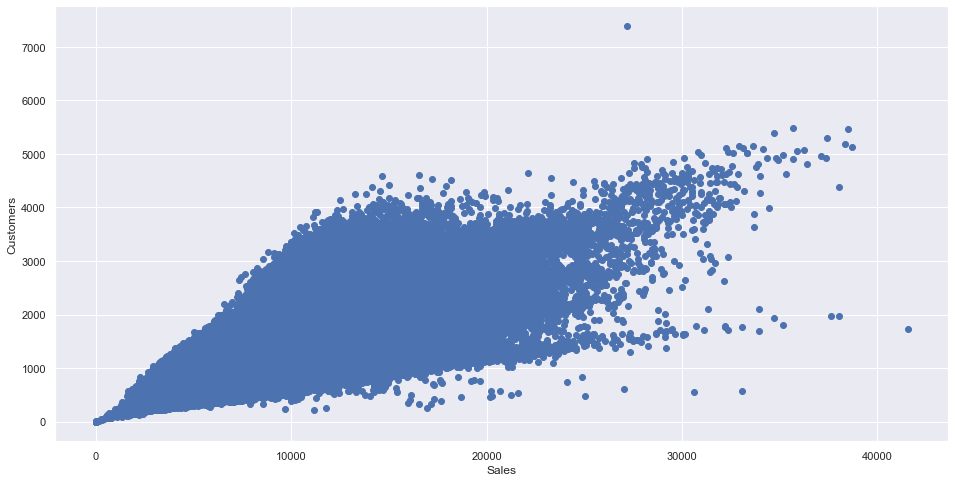

In [55]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_df[['Sales']], train_df[['Customers']])
ax.set_xlabel('Sales')
ax.set_ylabel('Customers')
plt.show()

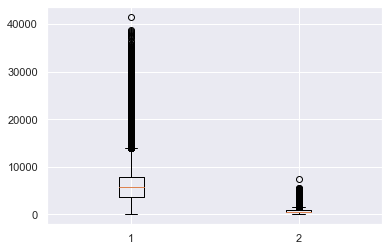

In [56]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

In [57]:
# From the presentation, there are outliers in the data 
# So, need to be handeled using appropriate method IQR in this case

# Therefore, each outlier value will be replaced by IQR value
df = dp.replace_outliers_iqr(train_df, ['Sales', 'Customers'])

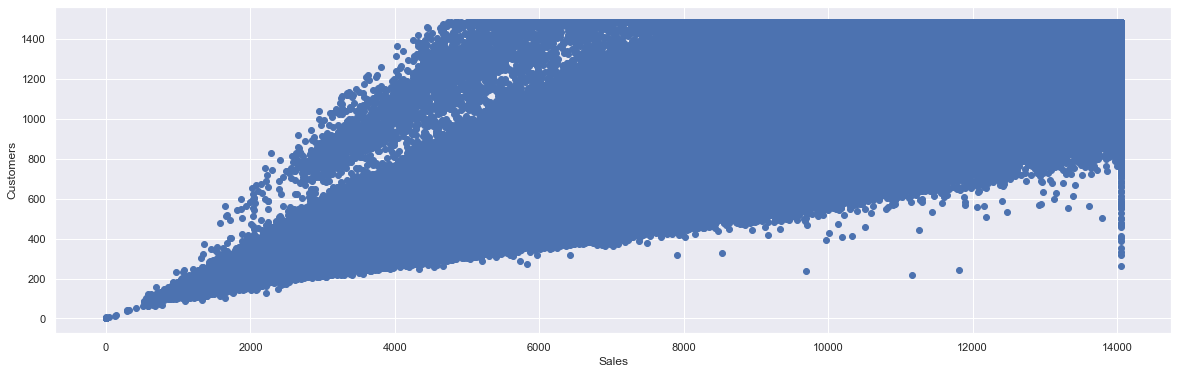

In [62]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(train_df[['Sales']], train_df[['Customers']])
ax.set_xlabel('Sales')
ax.set_ylabel('Customers')
plt.show()

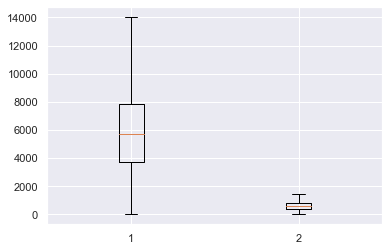

In [63]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

In [64]:
# outlier is handled well
train_df.head(5)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,Month,Year,Day,weekday,weekofyear,weekend
0,2015-07-31,1,4,5263.0,555.0,1,1,0,1,c,...,22.0,2012.0,"Jan,Apr,Jul,Oct",7,7,2015,31,4,31,0
1,2015-07-30,1,3,5020.0,546.0,1,1,0,1,c,...,22.0,2012.0,"Jan,Apr,Jul,Oct",7,7,2015,30,3,31,0
2,2015-07-29,1,2,4782.0,523.0,1,1,0,1,c,...,22.0,2012.0,"Jan,Apr,Jul,Oct",7,7,2015,29,2,31,0
3,2015-07-28,1,1,5011.0,560.0,1,1,0,1,c,...,22.0,2012.0,"Jan,Apr,Jul,Oct",7,7,2015,28,1,31,0
4,2015-07-27,1,0,6102.0,612.0,1,1,0,1,c,...,22.0,2012.0,"Jan,Apr,Jul,Oct",7,7,2015,27,0,31,1


In [66]:
print(train_df.columns)
print(test_df.columns)

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'month', 'Month', 'Year', 'Day',
       'weekday', 'weekofyear', 'weekend'],
      dtype='object')
Index(['Date', 'Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'weekday', 'weekofyear', 'weekend'],
      dtype='object')


In [67]:
# As shown above, Customers is not found in test set, need to be dropped
train_df.drop('Customers',inplace = True, axis=1)  #Because it is not in the test set

In [68]:
categorical_columns = ['PromoInterval', 'Assortment', 'StoreType']

# Label encoding
label_encoded_columns = dp.label_encode(train_df, categorical_columns)

In [69]:
train_df.drop(categorical_columns, axis=1, inplace=True)

# Merge DataFrames
train_df = pd.concat([train_df, label_encoded_columns], axis=1)

In [71]:
train_df.sort_values(["Store"], ignore_index=True, inplace=True)
test_df.sort_values(["Store"], ignore_index=True, inplace=True)
train_df.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)
test_df.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)

In [72]:
# Get the correlation with the target variable "Sale"
corr_matrix = train_df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                        1.000000
Open                         0.715977
Promo                        0.468557
SchoolHoliday                0.088484
Assortment                   0.074635
weekofyear                   0.050223
month                        0.045805
Month                        0.045805
Promo2SinceWeek              0.033582
Year                         0.025718
CompetitionOpenSinceYear     0.008260
Store                        0.003404
Promo2SinceYear             -0.004713
PromoInterval               -0.004929
StoreType                   -0.004961
Day                         -0.011411
CompetitionDistance         -0.012095
CompetitionOpenSinceMonth   -0.020931
Promo2                      -0.084233
weekend                     -0.279645
DayOfWeek                   -0.481886
weekday                     -0.481886
Name: Sales, dtype: float64

# Save the preprocessed Data

In [73]:
train_df.to_csv('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\processed_TrainingData.csv', index=True)
test_df.to_csv('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Data\\rossmann-store-sales\\Processed_TestData.csv', index=True)